**PART A**

Original Data Mean:  [0.00000000e+00 3.19029851e-01 5.40671642e+00 1.21361940e+01
 1.04477612e+01 3.82089552e+00 3.84328358e-01 0.00000000e+00
 3.73134328e-03 2.06902985e+00 1.00932836e+01 1.27444030e+01
 1.26809701e+01 8.43470149e+00 8.58208955e-01 0.00000000e+00
 5.59701493e-03 3.10634328e+00 9.69962687e+00 8.28917910e+00
 9.33768657e+00 8.48880597e+00 1.54664179e+00 0.00000000e+00
 1.86567164e-03 2.75559701e+00 7.85447761e+00 7.07835821e+00
 8.74813433e+00 6.58208955e+00 2.33395522e+00 0.00000000e+00
 0.00000000e+00 2.35261194e+00 6.54664179e+00 7.22014925e+00
 8.12873134e+00 5.53171642e+00 2.49440299e+00 0.00000000e+00
 0.00000000e+00 1.49067164e+00 7.91791045e+00 7.95708955e+00
 7.46082090e+00 6.40858209e+00 2.36753731e+00 5.59701493e-03
 5.59701493e-03 7.68656716e-01 9.61380597e+00 1.17294776e+01
 1.20000000e+01 1.05037313e+01 3.86940299e+00 4.53358209e-01
 1.86567164e-03 3.15298507e-01 5.46455224e+00 1.21940299e+01
 1.31623134e+01 8.61380597e+00 3.77611940e+00 1.14552239e+00]
Or

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


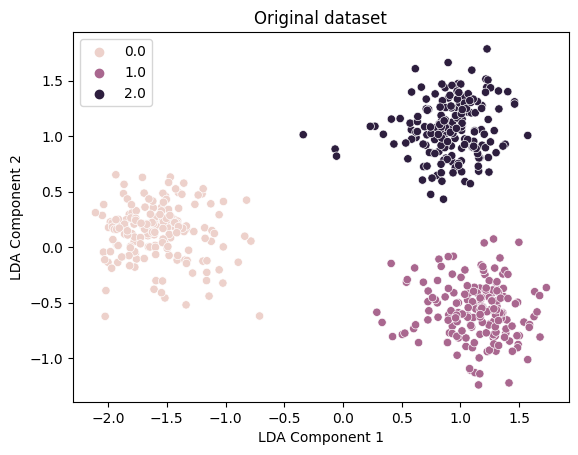

------------------------------------------------------------------------------------------------------
Normalized Data Mean:  [ 0.00000000e+00  3.97691830e-17 -1.19307549e-16  1.19307549e-16
 -1.52448535e-16 -5.30255773e-17  3.31409858e-17  0.00000000e+00
  3.31409858e-18  6.62819716e-17 -1.55762633e-16 -5.96537745e-17
 -3.97691830e-17  1.39192140e-16 -6.62819716e-17  0.00000000e+00
 -3.31409858e-18 -2.98268872e-17  9.44518096e-17  6.62819716e-17
  5.30255773e-17 -1.29249845e-16  9.27947603e-17  0.00000000e+00
 -3.31409858e-18  0.00000000e+00 -1.32563943e-17  8.61665631e-17
  1.39192140e-16  1.06051155e-16 -6.62819716e-17  0.00000000e+00
  0.00000000e+00 -1.98845915e-17 -5.30255773e-17 -3.97691830e-17
  1.20964598e-16 -3.64550844e-17  3.81121337e-17  0.00000000e+00
  0.00000000e+00 -3.97691830e-17 -6.62819716e-17  7.62242674e-17
  0.00000000e+00  7.29101688e-17  2.31986901e-17  6.62819716e-18
 -9.94229574e-18  3.97691830e-17 -1.01080007e-16 -6.62819716e-18
  1.98845915e-17  1.72333126e

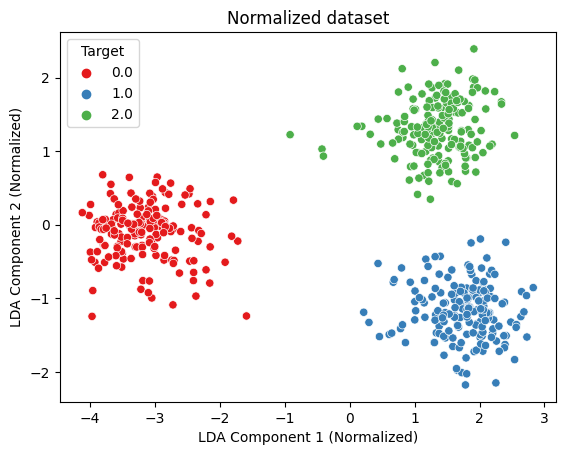

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig


# Load the dataset
df = pd.read_csv('./drive/MyDrive/cs5691_A2_DB1/dataset_1.csv', sep='\t')

# Drop rows with missing values
df.dropna(inplace=True)

# Extract features and target
X = df.iloc[:, :64].values
y = df.iloc[:, -1].values

# Perform normalization analysis on original data
X_means = np.mean(X, axis=0)
X_stds = np.std(X, axis=0)
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)

# Print results
print("Original Data Mean: ", X_means)
print("Original Data Standard Deviation: ", X_stds)
print("Original Data Minimum: ", X_min)
print("Original Data Maximum: ", X_max)

# Perform LDA

def lda(X, y, n_components=2, reg_param=0.0):
    """
    Linear Discriminant Analysis (LDA)
    Args:
        X (array-like): Input data matrix of shape (n_samples, n_features)
        y (array-like): Target vector of shape (n_samples,)
        n_components (int): Number of components to keep (default=2)
        reg_param (float): Regularization parameter (default=0.0)
    Returns:
        X_lda (array-like): LDA-transformed data of shape (n_samples, n_components)
    """
    classes = np.unique(y)
    n_classes = len(classes)
    n_features = X.shape[1]
    X_mean_class = np.zeros((n_classes, n_features))
    for i, c in enumerate(classes):
        X_mean_class[i] = np.mean(X[y == c], axis=0)
    X_mean_total = np.mean(X, axis=0)
    Sb = np.zeros((n_features, n_features))
    Sw = np.zeros((n_features, n_features))
    for i, c in enumerate(classes):
        class_count = X[y == c].shape[0]
        X_mean_diff = (X_mean_class[i] - X_mean_total).reshape(-1, 1)
        Sb += class_count * np.dot(X_mean_diff, X_mean_diff.T)
        X_c = X[y == c] - X_mean_class[i]
        Sw += np.dot(X_c.T, X_c)
    Sw += reg_param * np.eye(n_features)
    eigenvalues, eigenvectors = eig(np.dot(np.linalg.inv(Sw), Sb))
    eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(n_features)]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    W = np.hstack([eig_pairs[i][1].reshape(-1, 1) for i in range(n_components)])
    X_lda = np.dot(X, W)
    return X_lda

# Perform LDA with regularization
X_lda = lda(X, y, n_components=2, reg_param=1e-4)

# Convert LDA data to real numbers
X_lda_real = np.real(X_lda)

# Visualization with seaborn
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Original dataset')
plt.show()


print('------------------------------------------------------------------------------------------------------')

# Add small epsilon value to prevent division by zero
X_normalized = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-8) 

# Replace any resulting NaN values with zeros
X_normalized[np.isnan(X_normalized)] = 0 

# Perform normalization analysis on original data
X_norm_means = np.mean(X_normalized, axis=0)
X_norm_stds = np.std(X_normalized, axis=0)
X_norm_min = np.min(X_normalized, axis=0)
X_norm_max = np.max(X_normalized, axis=0)

# Print results
print("Normalized Data Mean: ", X_norm_means)
print("Normalized Data Standard Deviation: ", X_norm_stds)
print("Normalized Data Minimum: ", X_norm_min)
print("Normalized Data Maximum: ", X_norm_max)



print('------------------------------------------------------------------------------------------------------')

# Perform normalization analysis on LDA data
lda_normalized_means = np.mean(X_lda_real, axis=0)
lda_normalized_stds = np.std(X_lda_real, axis=0)
lda_normalized_min = np.min(X_lda_real, axis=0)
lda_normalized_max = np.max(X_lda_real, axis=0)

# Print results
print("Normalized LD1 Mean: ", lda_normalized_means[0])
print("Normalized LD2 Mean: ", lda_normalized_means[1])
print("Normalized LD1 Standard Deviation: ", lda_normalized_stds[0])
print("Normalized LD2 Standard Deviation: ", lda_normalized_stds[1])
print("Normalized LD1 Minimum: ", lda_normalized_min[0])
print("Normalized LD2 Minimum: ", lda_normalized_min[1])
print("Normalized LD1 Maximum: ", lda_normalized_max[0])
print("Normalized LD2 Maximum: ", lda_normalized_max[1])

# Perform LDA with regularization

# # Add small epsilon value to prevent division by zero
# X_normalized = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-8) 

# # Replace any resulting NaN values with zeros
# X_normalized[np.isnan(X_normalized)] = 0 
X_lda_real = lda(X_normalized, y, n_components=2, reg_param=1e-4)

# Convert LDA data to real numbers
X_lda_real = lda(X_normalized, y, n_components=2, reg_param=1e-4)
X_lda_real = np.real(X_lda_real)

# Plot the LDA data
sns.scatterplot(x=X_lda_real[:, 0], y=X_lda_real[:, 1], hue=y, palette='Set1')
plt.xlabel('LDA Component 1 (Normalized)')
plt.ylabel('LDA Component 2 (Normalized)')
plt.title("Normalized dataset")
plt.legend(title='Target', loc='best')
plt.show()





Plot of mean of data


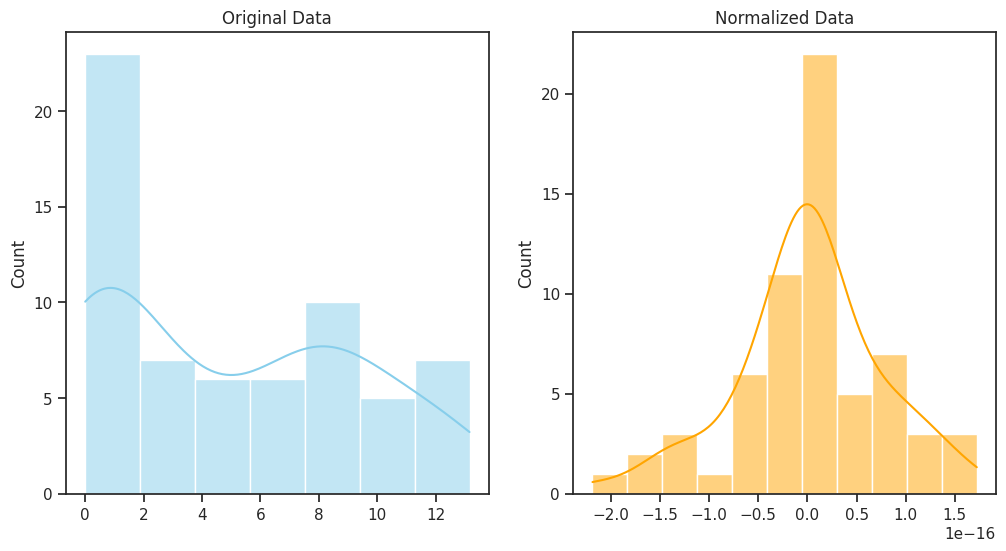

Plot of std of data


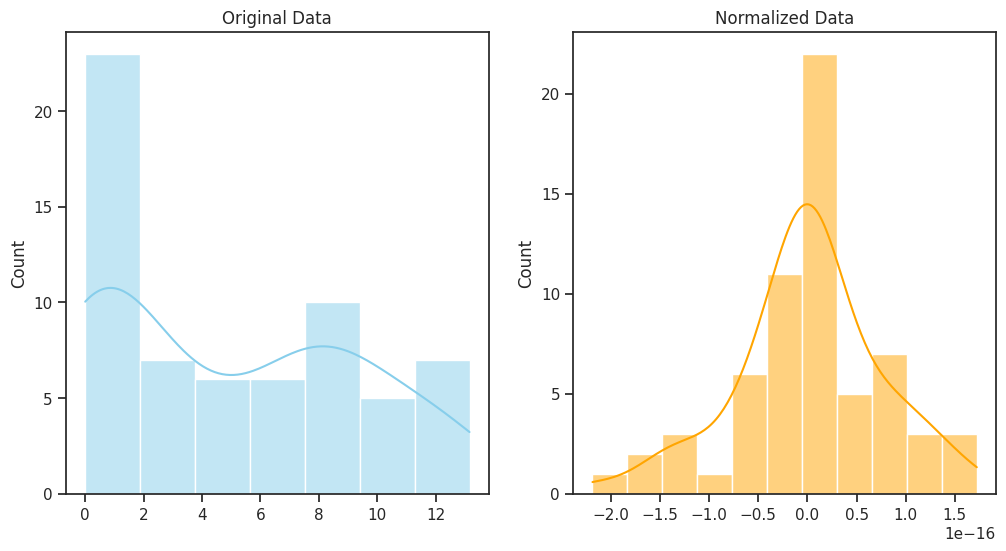

Plot of min of data


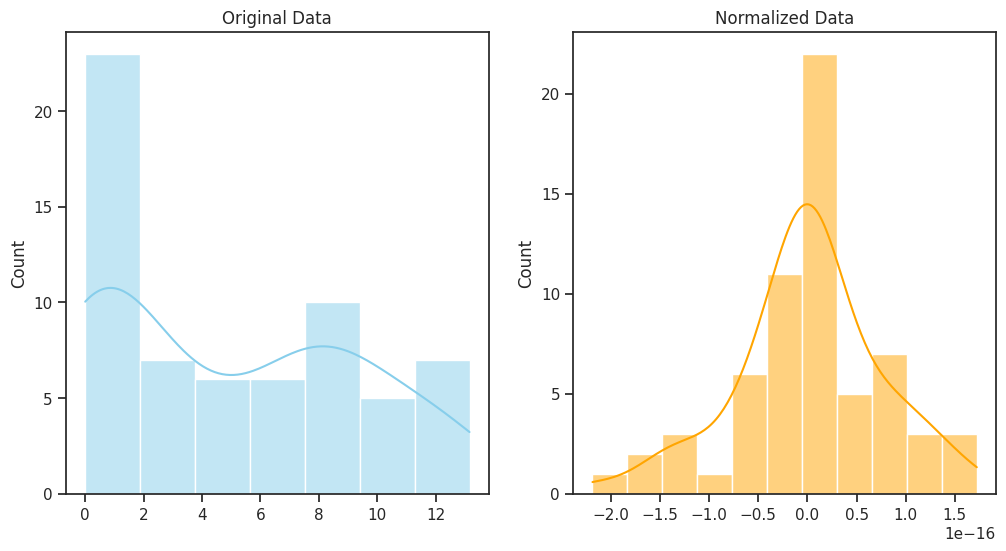

Plot of max of data


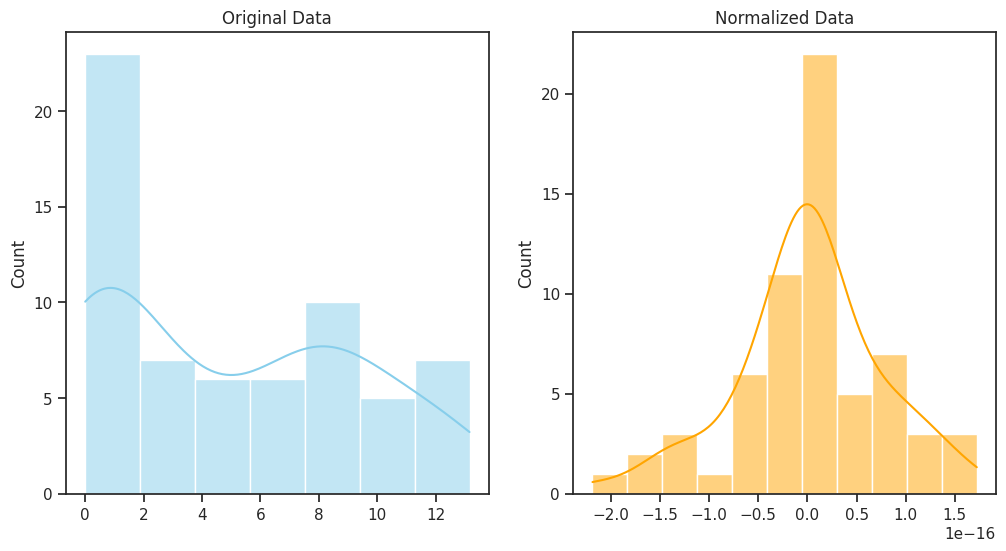

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plotHistogrmas(data, norm_data):
  fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

  # Original data histogram
  sns.histplot(X_means, ax=axes[0], kde=True, color='skyblue')
  axes[0].set_title('Original Data')

  # Normalized data histogram
  sns.histplot(X_norm_means, ax=axes[1], kde=True, color='orange')
  axes[1].set_title('Normalized Data')
  plt.show()

print("Plot of mean of data")
plotHistogrmas(X_means, X_norm_means)

print("Plot of std of data")
plotHistogrmas(X_stds, X_norm_stds)

print("Plot of min of data")
plotHistogrmas(X_min, X_norm_min)

print("Plot of max of data")
plotHistogrmas(X_max, X_norm_max)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PART B**

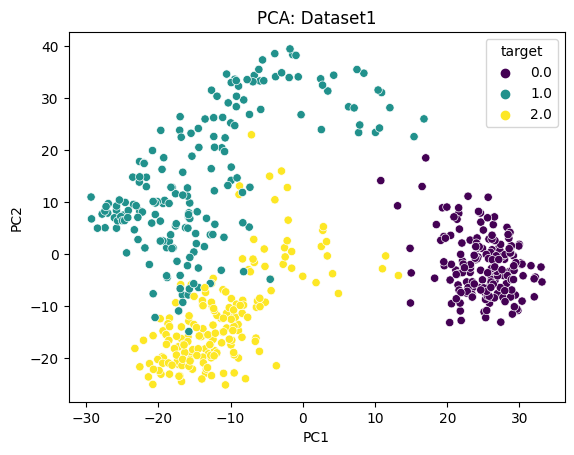

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load dataset1 without headers
df = pd.read_csv('./drive/MyDrive/cs5691_A2_DB1/dataset_1.csv', sep='\t', header=None)

# Extract features and target
X = df.iloc[:, :-1].values  # Exclude the last column as the target
y = df.iloc[:, -1].values

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Visualize PCA data
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA: Dataset1')
plt.show()


Description of visualizations:
The visualizations obtained using LDA and PCA show distinct characteristics. The LDA plot shows clusters of data points that are well-separated and have clear boundaries, indicating that the data points are grouped together based on their class labels. On the other hand, the PCA plot shows a distribution of data points in a lower-dimensional space, with some overlapping regions and no clear separation of data points based on class labels.

Similarities:
Both LDA and PCA visualizations show a reduction in the dimensionality of the data, projecting the data points onto a lower-dimensional space. In both cases, the visualizations provide a representation of the data in a transformed space that captures the main patterns or structures in the data.

Differences:
One notable difference between the LDA and PCA visualizations is the clear separation of data points based on class labels in the LDA plot, which is not evident in the PCA plot. This suggests that LDA may be more effective in capturing the discriminative features of the data that are relevant for class separation. In contrast, PCA focuses on capturing the overall variability in the data without considering class labels, which may result in overlapping data points in the PCA plot.

Interpretation of observations:
The observed differences in the visualizations can be attributed to the underlying assumptions and techniques of LDA and PCA. LDA is a supervised dimensionality reduction technique that takes into account class labels during the projection of data points, which can result in better separation of classes in the transformed space. On the other hand, PCA is an unsupervised technique that focuses on capturing the overall variability in the data without considering class labels, which may result in overlapping data points and less clear separation of classes in the transformed space.

Conclusion:
In conclusion, the visualizations obtained using LDA and PCA exhibit differences in terms of the separation of data points based on class labels. LDA appears to perform better in capturing the discriminative features of the data and showing clear separation of classes in the transformed space, while PCA provides a more general representation of the overall variability in the data without considering class labels. However, the effectiveness of each technique may depend on the specific dataset and analysis goals, and further analysis or evaluation may be needed to determine the most appropriate technique for a given task.

**PART C**

Training Accuracy: 1.0
Testing Accuracy: 1.0


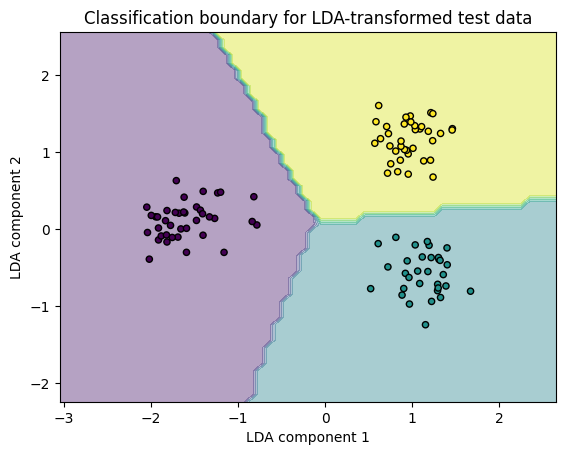

Confusion Matrix (Train Data):
[[139.   0.   0.]
 [  0. 150.   0.]
 [  0.   0. 140.]]
[100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0]


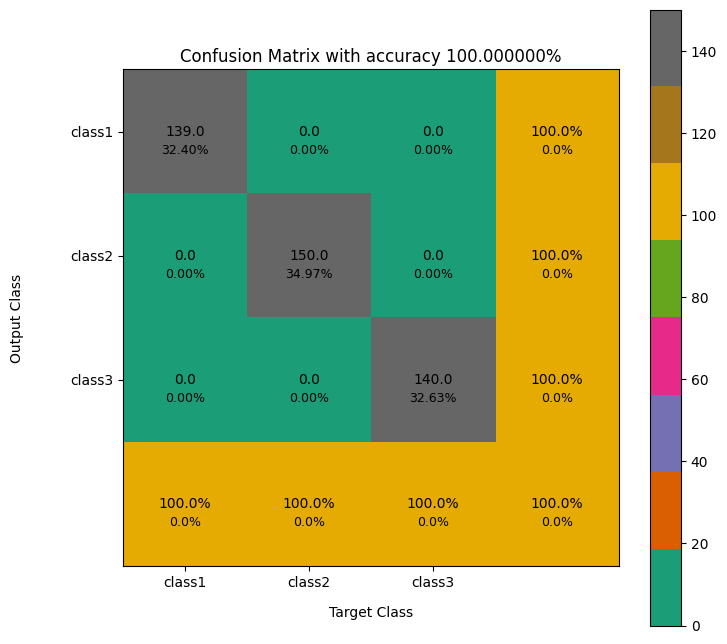

Confusion Matrix (Test Data):
[[39.  0.  0.]
 [ 0. 32.  0.]
 [ 0.  0. 37.]]
[100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0]


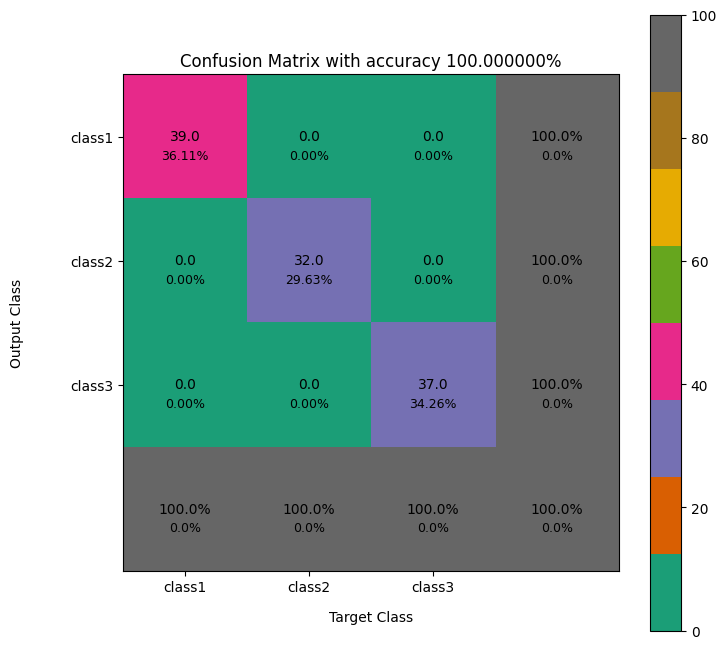

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

def bayes_classifier(x_train, y_train, x_test):
    # Calculate class probabilities
    class_probabilities = {}
    for class_label in np.unique(y_train):
        class_probabilities[class_label] = np.sum(y_train == class_label) / len(y_train)
    
    # Calculate mean and standard deviation for each feature and each class
    means = {}
    stds = {}
    for class_label in np.unique(y_train):
        class_data = x_train[y_train == class_label]
        means[class_label] = np.mean(class_data, axis=0)
        stds[class_label] = np.std(class_data, axis=0)
    
    # Classify test data
    y_pred = []
    for i in range(len(x_test)):
        # Calculate probability for each class
        probabilities = {}
        for class_label in np.unique(y_train):
            p = class_probabilities[class_label]
            for j in range(len(x_test[i])):
                p *= 1 / (np.sqrt(2 * np.pi) * stds[class_label][j]) * np.exp(-0.5 * ((x_test[i][j] - means[class_label][j]) / stds[class_label][j]) ** 2)
            probabilities[class_label] = p
        
        # Select class with highest probability
        y_pred.append(max(probabilities, key=probabilities.get))
    
    return y_pred

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def plot_confusion_matrix(y_true, y_pred, c):
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    n_labels = len(unique_labels)
    confusion_mat = np.zeros((n_labels, n_labels))
    for i in range(n_labels):
        for j in range(n_labels):
            confusion_mat[i, j] = np.sum((y_true == unique_labels[i]) & (y_pred == unique_labels[j]))
    print(confusion_mat)
    total = np.sum(confusion_mat)
    percentages = (confusion_mat / total) * 100
    new_column=[]
    for i in range(len(confusion_mat)):
      new_column.append(100*confusion_mat[i][i]/np.sum(confusion_mat[i]))
    print(new_column)
    new_row=[]
    confusion_mat=confusion_mat.T
    for i in range(len(confusion_mat)):
      new_row.append(100*confusion_mat[i][i]/np.sum(confusion_mat[i]))
    l=np.sum(new_row)/(len(new_row))
    new_row.append(np.sum(new_row)/(len(new_row)))
    confusion_mat=confusion_mat.T
    print(new_row)
    percentage=np.hstack((confusion_mat,np.array([new_column]).T))
    percentage=np.vstack((percentage,np.array([new_row])))
    confusion_mat=percentage

    #Create heatmap with annotations
    fig,ax = plt.subplots(figsize=(8,8))  #Set figsize to increase the size of cells
    im = ax.imshow(confusion_mat,cmap='Dark2')

    #Loop over data dimensions and create text
    for i in range(len(confusion_mat)):
        for j in range(len(confusion_mat[0])):
            #Add confusion matrix text
            if i!=len(confusion_mat)-1 and j!=len(confusion_mat)-1:
              ax.text(j,i+0.15,f'{percentages[i,j]:.2f}%',ha="center",va="center",color="black",fontsize=9)
              ax.text(j,i,f'{confusion_mat[i,j]:}',ha="center",va="center",color="black")
            else:
              ax.text(j,i,f'{confusion_mat[i,j]:.1f}'+'%',ha="center",va="center",color="black")
              ax.text(j,i+0.15,f'{100-confusion_mat[i,j]:.1f}'+'%', ha="center",va="center",color="black",fontsize=9)
    #Set ticks and axis labels
    ax.set_xticks(np.arange(len(confusion_mat)-1))
    ax.set_yticks(np.arange(len(confusion_mat)-1))
    ax.set_xticklabels(['class1','class2','class3'])
    ax.set_yticklabels(['class1','class2','class3'])
    ax.set_xlabel('Target Class')
    ax.set_ylabel('Output Class')
    ax.xaxis.set_label_coords(0.5,-0.08)
    ax.yaxis.set_label_coords(-0.2,0.5)
    ax.grid(False)
    ax.set_title(f"Confusion Matrix with accuracy {l:1f}%")    
    fig.colorbar(im)
    plt.show()

df = pd.read_csv('./drive/MyDrive/cs5691_A2_DB1/dataset_1.csv', sep='\t', header=None)

X = df.iloc[:, :64].values
y = df.iloc[:, -1].values

X_lda = lda(X, y, n_components=2, reg_param=1e-4)
x = np.real(X_lda)

# Shuffle the data and split into training and testing sets
perm = np.random.permutation(len(x))
x, y = x[perm], y[perm]
train_size = int(0.8 * len(x))
x_lda_train, y_train = x[:train_size], y[:train_size]
x_lda_test, y_test = x[train_size:], y[train_size:]

y_pred_train = bayes_classifier(x_lda_train, y_train, x_lda_train)
y_pred_test = bayes_classifier(x_lda_train, y_train, x_lda_test)


# Calculate training and testing accuracy
train_acc = accuracy(y_train, y_pred_train)
test_acc = accuracy(y_test, y_pred_test)
print('Training Accuracy:', train_acc)
print('Testing Accuracy:', test_acc)

# Plot classification boundary
x_min, x_max = x_lda_test[:, 0].min() - 1, x_lda_test[:, 0].max() + 1
y_min, y_max = x_lda_test[:, 1].min() - 1, x_lda_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array(bayes_classifier(x_lda_train, y_train, np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_lda_test[:, 0], x_lda_test[:, 1], c=y_pred_test, s=20, edgecolor='k')
plt.title('Classification boundary for LDA-transformed test data')
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')
plt.show()

# Train data
print('Confusion Matrix (Train Data):')
plot_confusion_matrix(y_train, y_pred_train, "training data")

# Test data
print('Confusion Matrix (Test Data):')
plot_confusion_matrix(y_test,y_pred_test, "test data")
